In [149]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

# SKLEARN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [150]:
df = pd.read_csv("./bank-additional-full.csv", delimiter = ";")

In [151]:
df_dummies = pd.get_dummies(df)
df_dummies = df_dummies.drop(["y_no", "duration"], axis=1)

In [152]:
features = list(df_dummies.drop(["y_yes"], axis = 1))
target = "y_yes"

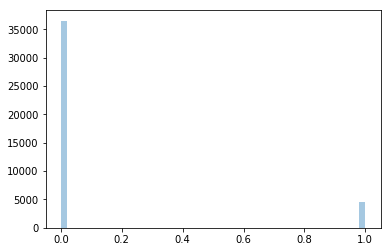

In [153]:
# Plot histogram.
x = np.array(df_dummies["y_yes"])
sns.distplot(x, kde = False, rug = False);

In [154]:
clf = RandomForestClassifier(n_estimators = 10)

In [155]:
x = df_dummies.drop("y_yes", axis = 1)
y = df_dummies["y_yes"]
cross_val_array = cross_val_score(clf, x, y, cv = 10)

Results of 10-fold stratified cross-validation

In [156]:
print(cross_val_array)

[0.89 0.87 0.45 0.79 0.75 0.5  0.28 0.1  0.42 0.2 ]


In [157]:
clf.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [158]:
importances = clf.feature_importances_
std = np.std(
    [tree.feature_importances_ for tree in clf.estimators_],
    axis=0
)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(x.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

Feature ranking:
1. age (0.161520)
2. euribor3m (0.132194)
3. campaign (0.085482)
4. cons.conf.idx (0.042303)
5. cons.price.idx (0.029178)
6. pdays (0.026184)
7. housing_yes (0.022607)
8. poutcome_success (0.022361)
9. housing_no (0.020159)
10. emp.var.rate (0.018596)
11. job_admin. (0.018442)
12. nr.employed (0.017440)
13. marital_married (0.016863)
14. education_high.school (0.016801)
15. education_university.degree (0.016352)
16. previous (0.015988)
17. poutcome_nonexistent (0.015293)
18. day_of_week_thu (0.014655)
19. day_of_week_wed (0.014557)
20. marital_single (0.014547)
21. day_of_week_mon (0.014480)
22. day_of_week_fri (0.014227)
23. job_technician (0.013962)
24. day_of_week_tue (0.013716)
25. loan_no (0.013564)
26. loan_yes (0.012956)
27. education_professional.course (0.012103)
28. job_blue-collar (0.011829)
29. education_basic.9y (0.011260)
30. marital_divorced (0.010775)
31. job_management (0.009070)
32. job_services (0.008618)
33. contact_cellular (0.008327)
34. education

(0, 0.19947327733585649)

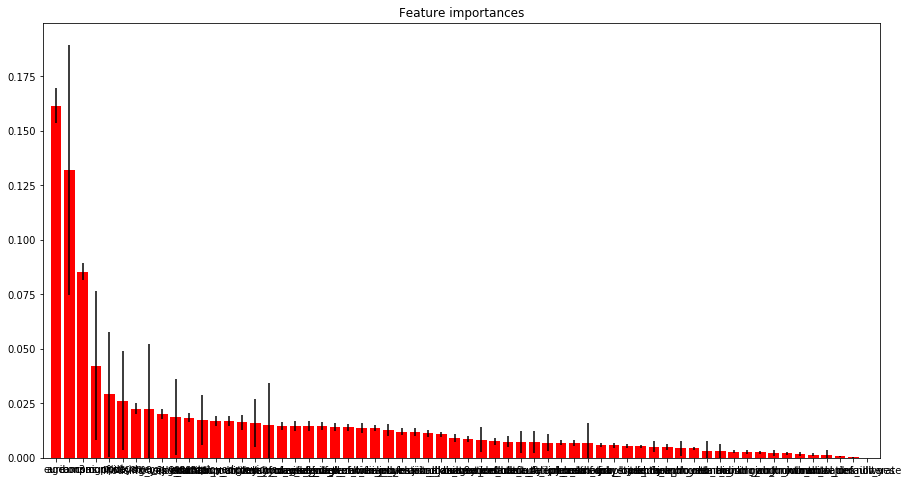

In [159]:
# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(
    range(x.shape[1]), 
    importances[indices],
    color = "r", 
    yerr = std[indices], 
    align = "center"
)
plt.xticks(range(x.shape[1]), np.array(features)[indices])
plt.xlim([-1, x.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

In [160]:
# Compute confusion matrix
y_pred = clf.predict(x)
cnf_matrix = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)

In [161]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[1.   0.  ]
 [0.15 0.85]]


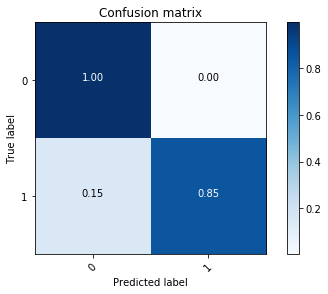

In [162]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y))), normalize = True,
title='Confusion matrix')